In [6]:
# importing dependencies and knowing their versions
import sys
print('Python: {}'.format(sys.version))
import scipy
print('Scipy: {}'.format(scipy.__version__))
import numpy
print('Numpy: {}'.format(numpy.__version__))
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('pandas: {}'.format(pandas.__version__))
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
Scipy: 1.7.3
Numpy: 1.21.5
matplotlib: 3.5.1
pandas: 1.4.2
sklearn: 1.0.2


In [7]:
# importing the functions from the modules pandas, matplotlib, sklearn
import pandas
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [8]:
# loading the data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal_width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names) # using the read_csv function from pandas

In [9]:
# dimensions of the dataset
print(dataset.shape) # dataset->object, .shape->function

(150, 5)


In [10]:
# having a look at the data
print(dataset.head(20)) # dataset->object, head(20)->return the first 20 columns (0-19)

    sepal-length  sepal_width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [11]:
# statistical summary
print(dataset.describe()) # describe()->describes the dataset with count, mean, std...

       sepal-length  sepal_width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [13]:
# class distribution
print(dataset.groupby('class').size()) # tells the types of classes and the no. of records available

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


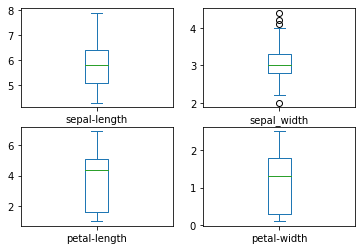

In [19]:
# univariate plots-box and whisker plots
dataset.plot(kind='box',subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show() # show()->display the graph/plot, pyplot->accesses the plot 
# matplotlib is used to display the dataset in plots

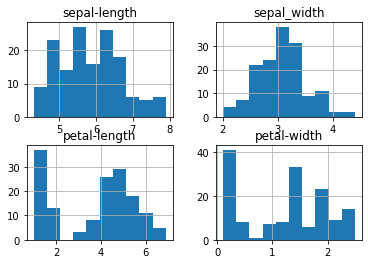

In [20]:
# histogram of the variable using hist()
dataset.hist()
pyplot.show()

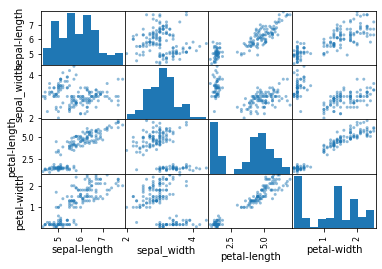

In [21]:
# multivariate plots
scatter_matrix(dataset)
pyplot.show()

In [23]:
# creating a validation dataset, splitting the dataset
array = dataset.values
x = array[:,0:4]
y = array[:,4]
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=1)

In [31]:
# logistic Regression, Linear Discriminant Analysis, K-Nearest neighbors, Classification and Regression Trees, Gaussian Naive Bayes, Support Vector Machines
# building models
models = [] # empty model
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [32]:
# evaluating the created models
results = [] # empty list
names =[] # empty list
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    ''' ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True. '''
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results) # adding cv_results to the empty list
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.950000 (0.055277)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


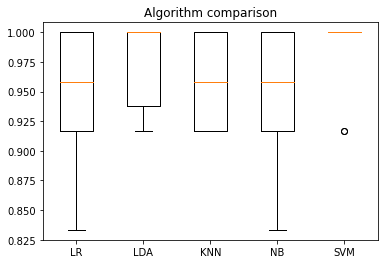

In [34]:
# comparing our models
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm comparison') # giving out plot a title
pyplot.show()

In [38]:
# making predictions
model = SVC(gamma='auto')
model.fit(x_train, y_train)
predictions = model.predict(x_validation)
# evaluating our predictions
print(accuracy_score(y_validation, predictions),"\n")
print(confusion_matrix(y_validation, predictions), "\n")
print(classification_report(y_validation, predictions))

0.9666666666666667 

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]] 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
# accuracy = approx(96%)
# Thus, the given data set is classified